In [7]:
import numpy as np
import matplotlib.pyplot as plt

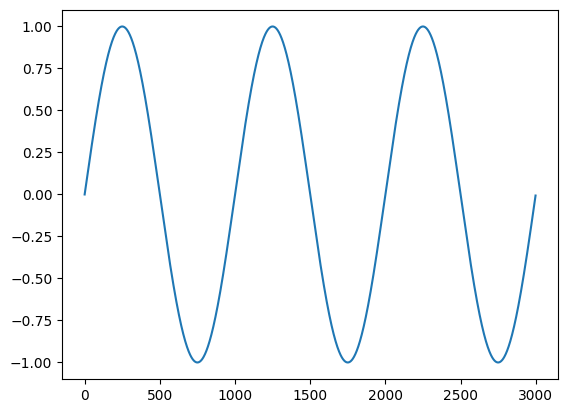

In [30]:
x = np.arange(3000)
frequency = 3.0
y = np.sin(x / len(x) * np.pi * 2 * frequency)
plt.plot(x, y)

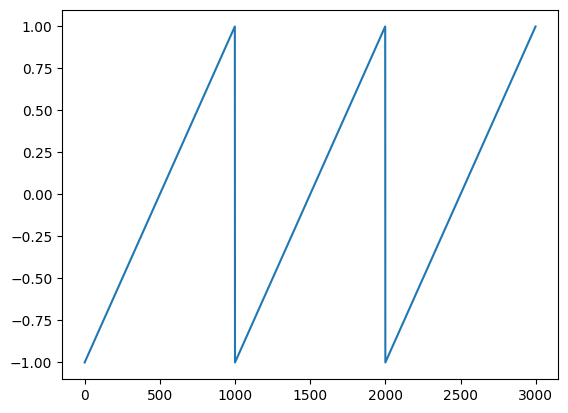

In [32]:
# value = fmod(time * frequency, 1.0f) * 2.0f - 1.0f;
y = np.fmod(x * frequency / len(x), 1.0) * 2.0 - 1.0
plt.plot(x, y)

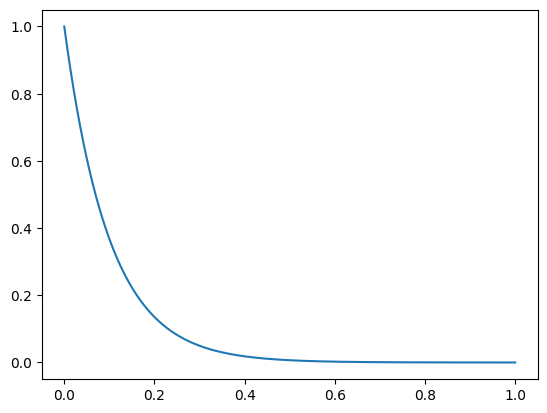

In [41]:
plt.plot(x/x[-1], np.exp(-10 * x/x[-1]))

In [43]:
class Envelope:
    def __init__(self, attack, decay, sustain, release):
        self.attack = attack
        self.decay = decay
        self.sustain = sustain
        self.release = release

    def __call__(self, time):
        """Calculates the envelope value at a given time (in seconds)"""
        envelope = 0.0
        if time < self.attack:
            envelope = time / self.attack
        elif time < self.attack + self.decay:
            envelope = 1.0 - (1.0 - self.sustain) * (time - self.attack) / self.decay
        elif time < self.attack + self.decay + self.sustain:
            envelope = self.sustain
        else:  # time >= self.attack + self.decay + self.sustain 
            envelope = self.sustain - self.sustain * (time - self.attack - self.decay - self.sustain) / self.release
        return envelope

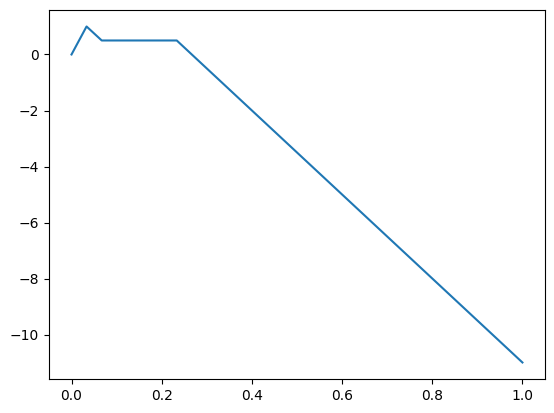

In [45]:
env = Envelope(0.1, 0.1, 0.5, 0.1)

y = []
for i in range(3000):
    y.append(env(i / 1000))

plt.plot(x/x[-1], y)